In [ ]:
#!/usr/bin/env python
# -*- encoding: utf-8 -*-
'''
@文件        :013.hmox1.ipynb
@说明        : this is script for hmox1 in different cell types
@时间        :2023/04/21 09:53:54
@作者        :Wu Baosheng
@版本        :1.0
'''
#############  #############

In [1]:
import scanpy as sc
import os,re,sys
import pandas as pd
import numpy as np
import scanpy.external as sce
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
# sns.set(style='white', font_scale=1)
# %config InlineBackend.figure_format = 'svg'
os.chdir('H:/002.singcell/01.liver/10.mutileSpecies/05.SAMap')

In [89]:
adata = sc.read_h5ad('sevenSpecies.integrate2.h5ad')

In [90]:
adata=adata[~(adata.obs['cell_type']=='redCell')]

In [91]:
adata.obs['cell_type'].unique()

['hepatocyte', 'stellate', 'lymphocyte', 'endothelia', 'Macrophage', 'cholangiocyte']
Categories (6, object): ['hepatocyte', 'stellate', 'lymphocyte', 'endothelia', 'Macrophage', 'cholangiocyte']

In [92]:
adata

View of AnnData object with n_obs × n_vars = 258714 × 138094
    obs: 'species', 'cluster', 'sample', 'leiden', 'sample1', 'batch', 'cell_type'
    uns: 'cell type_colors', 'cell_type_colors', 'gnnm_corr', 'homology_gene_names_dict', 'leiden', 'leiden_colors', 'mapping_K', 'neighbors', 'rank_genes_groups', 'species_colors', 'umap'
    obsm: 'X_pca_harmony', 'X_umap', 'wPCA'
    layers: 'X_disp'
    obsp: 'connectivities', 'distances', 'knn', 'xsim'
    varp: 'homology_graph', 'homology_graph_reweighted'

In [12]:
def transSpeciesSadata2(adata,species,cluster='leiden',min_values=10):
    adata2=adata[adata.obs['species']==species]
    # if species=='lamprey':
    #     adata2=adata2[:,adata2.var_names.str.startswith('lm')]
    # else:
    #     sp = species[:2]
    #     adata2=adata2[:,adata2.var_names.str.startswith(sp)]
    df1=adata2.obs[cluster].value_counts()
    target_group = df1[df1.values>min_values].index.to_list()
    adata2 = adata2[adata2.obs[cluster].isin(target_group)]
    # sc.tl.rank_genes_groups(adata2, cluster, method='wilcoxon')
    return adata2

In [42]:
human=transSpeciesSadata2(adata,species='human',cluster='cell_type',min_values=50)
frog=transSpeciesSadata2(adata,species='frog',cluster='cell_type',min_values=1)
frog=frog[~(frog.obs['cell_type']=='redCell')]
lungfish=transSpeciesSadata2(adata,species='lungfish',cluster='cell_type',min_values=1)
bichir=transSpeciesSadata2(adata,species='bichir',cluster='cell_type',min_values=50)
dogshark=transSpeciesSadata2(adata,species='dogshark',cluster='cell_type',min_values=50)
lamprey=transSpeciesSadata2(adata,species='lamprey',cluster='cell_type',min_values=50)
lancelet=transSpeciesSadata2(adata,species='lancelet',cluster='cell_type',min_values=50)

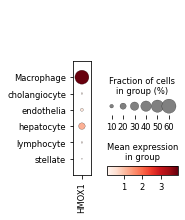

In [43]:
sc.pl.dotplot(human,['HMOX1'],groupby='cell_type')

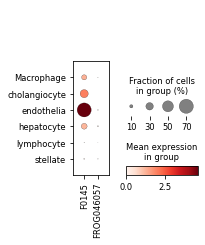

In [44]:
sc.pl.dotplot(frog,['F0145','FROG046057'],groupby='cell_type')

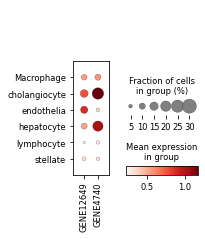

In [45]:
sc.pl.dotplot(lungfish,['GENE12649','GENE4740'],groupby='cell_type')

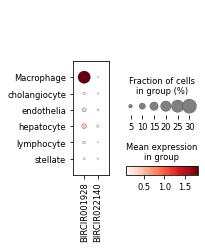

In [46]:
sc.pl.dotplot(bichir,['BIRCIR001928','BIRCIR022140'],groupby='cell_type')

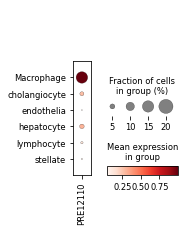

In [47]:
sc.pl.dotplot(dogshark,['PRE12110'],groupby='cell_type')

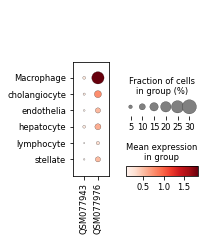

In [26]:
sc.pl.dotplot(lamprey,['QSM077943','QSM077976'],groupby='cell_type')

In [71]:
# adata1=sc.read('H:/002.singcell/01.liver/04.lungfish/lungfish.integrate.h5ad')
adata1=sc.read('H:/002.singcell/01.liver/05.frog/frog.integrate.h5ad')

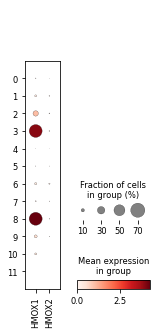

In [72]:
sc.pl.dotplot(adata1,['HMOX1','HMOX2'],groupby='leiden')

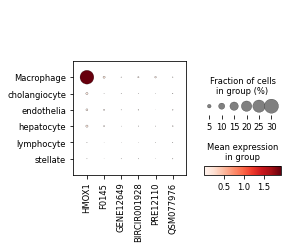

In [59]:
sc.pl.dotplot(adata,['HMOX1','F0145','GENE12649','BIRCIR001928','PRE12110','QSM077976'],groupby='cell_type')

<Figure size 3721.68x2035.44 with 0 Axes>

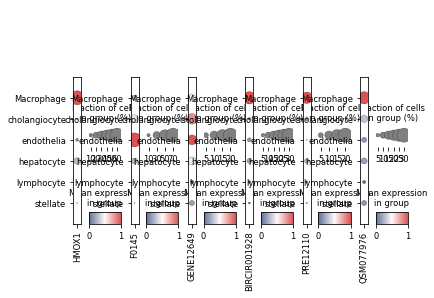

In [66]:
cmap = sns.blend_palette(['#5F6F94','#FFFAFA','#DD5353'],as_cmap=True) 
plt.figure(figsize = (51.69,28.27))
fig, axes = plt.subplots(1,6)
sc.pl.dotplot(human,['HMOX1'],groupby='cell_type',ax=axes[0],show=False,cmap=cmap,standard_scale='var')
sc.pl.dotplot(frog,['F0145'],groupby='cell_type',ax=axes[1],show=False,cmap=cmap,standard_scale='var')
sc.pl.dotplot(lungfish,['GENE12649'],groupby='cell_type',ax=axes[2],show=False,cmap=cmap,standard_scale='var')
sc.pl.dotplot(bichir,['BIRCIR001928'],groupby='cell_type',ax=axes[3],show=False,cmap=cmap,standard_scale='var')
sc.pl.dotplot(dogshark,['PRE12110'],groupby='cell_type',ax=axes[4],show=False,cmap=cmap,standard_scale='var')
sc.pl.dotplot(lamprey,['QSM077976'],groupby='cell_type',ax=axes[5],show=False,cmap=cmap,standard_scale='var')
plt.savefig('H:/002.singcell/01.liver/10.mutileSpecies/05.SAMap/07.Heps/matrixplot_hmox1.png',dpi=300)
plt.savefig('H:/002.singcell/01.liver/10.mutileSpecies/05.SAMap/07.Heps/matrixplot_hmox1.pdf',dpi=300)

<AxesSubplot:xlabel='cell type', ylabel='QSM077976'>

<Figure size 3721.68x2035.44 with 0 Axes>

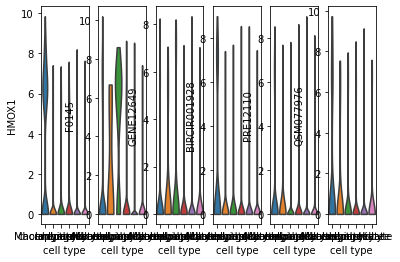

In [70]:
cmap = sns.blend_palette(['#5F6F94','#FFFAFA','#DD5353'],as_cmap=True) 
plt.figure(figsize = (51.69,28.27))
fig, axes = plt.subplots(1,6)
sc.pl.violin(human,['HMOX1'],groupby='cell_type',ax=axes[0],show=False,cmap=cmap,standard_scale='var',stripplot=False)
sc.pl.violin(frog,['F0145'],groupby='cell_type',ax=axes[1],show=False,cmap=cmap,standard_scale='var',stripplot=False)
sc.pl.violin(lungfish,['GENE12649'],groupby='cell_type',ax=axes[2],show=False,cmap=cmap,standard_scale='var',stripplot=False)
sc.pl.violin(bichir,['BIRCIR001928'],groupby='cell_type',ax=axes[3],show=False,cmap=cmap,standard_scale='var',stripplot=False)
sc.pl.violin(dogshark,['PRE12110'],groupby='cell_type',ax=axes[4],show=False,cmap=cmap,standard_scale='var',stripplot=False)
sc.pl.violin(lamprey,['QSM077976'],groupby='cell_type',ax=axes[5],show=False,cmap=cmap,standard_scale='var',stripplot=False)
# plt.savefig('H:/002.singcell/01.liver/10.mutileSpecies/05.SAMap/07.Heps/matrixplot_hmox1.png',dpi=300)
# plt.savefig('H:/002.singcell/01.liver/10.mutileSpecies/05.SAMap/07.Heps/matrixplot_hmox1.pdf',dpi=300)

In [93]:
mac=adata[adata.obs['cell_type']=='Macrophage']

2023-04-21 18:33:08,313 - harmonypy - INFO - Iteration 1 of 20
2023-04-21 18:33:26,984 - harmonypy - INFO - Iteration 2 of 20
2023-04-21 18:33:43,350 - harmonypy - INFO - Converged after 2 iterations


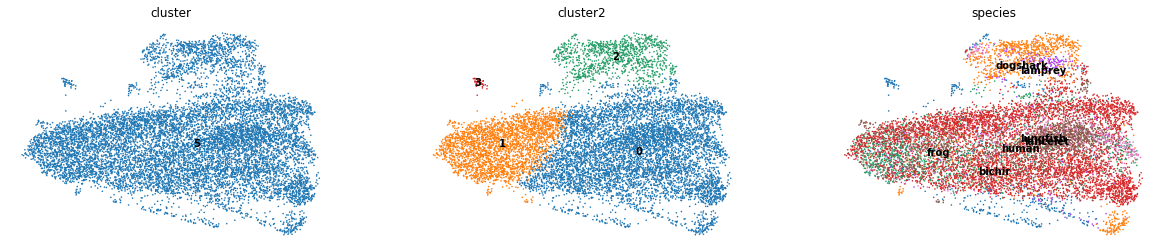

In [95]:
sce.pp.harmony_integrate(mac, key="species",theta=0.2,basis='wPCA',max_iter_harmony = 20,reference_values=['human']) ########### first time  we used the 'batch' as the key to integrate different data
sc.pp.neighbors(mac,n_neighbors=15, n_pcs=40,use_rep="X_pca_harmony")
sc.tl.umap(mac,min_dist=0.5,spread=1)
sc.tl.leiden(mac, key_added='leiden2', resolution=0.1)
sc.pl.umap(mac, color=['leiden', "leiden2","species"], title=["cluster","cluster2",'species'], palette=sc.pl.palettes.default_20, show=True, alpha=1,legend_loc='on data',size=10,add_outline=True,outline_color=["white","white"],frameon=False)

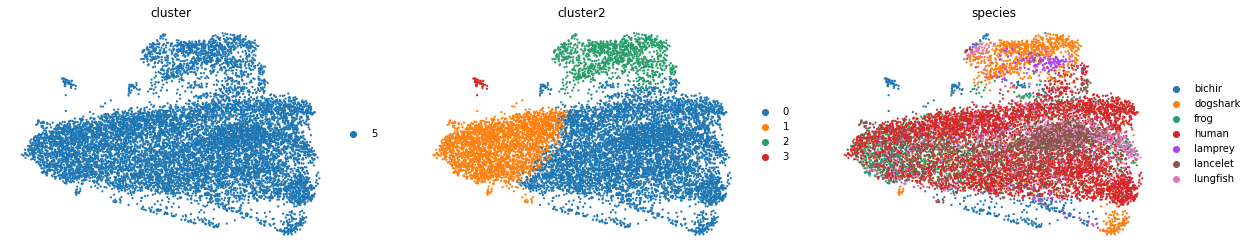

In [133]:
sc.pl.umap(mac, color=['leiden', "leiden2","species"], title=["cluster","cluster2",'species'], palette=sc.pl.palettes.default_20, show=True, alpha=1,size=20,add_outline=True,outline_color=["white","white"],frameon=False)

In [97]:
def cellCount(data,group='leiden'):
    counts = pd.DataFrame()
    for sp in data.obs['species'].unique():
        tmp=pd.DataFrame(data[data.obs['species']==sp].obs[group].value_counts())
        tmp.columns=[sp]
        counts=pd.concat([counts,tmp],axis=1)
    counts.fillna(0,inplace=True)
    counts=counts[['human','frog','lungfish','bichir','dogshark','lamprey','lancelet']]
    counts.fillna(0,inplace=True)
    counts_pct = counts.div(counts.sum(axis=0), axis=1)
    counts.index=counts.index
    counts_pct.index=counts_pct.index
    counts.sort_index(axis=0,inplace=True)
    counts_pct.sort_index(axis=0,inplace=True)
    return [counts,counts_pct]

In [115]:
cellCount(mac,group='leiden2')[0]

,human,frog,lungfish,bichir,dogshark,lamprey,lancelet
0,3941.0,638.0,383.0,390,295.0,65.0,1295.0
1,1369.0,816.0,73.0,72,130.0,26.0,297.0
2,69.0,17.0,47.0,33,797.0,130.0,19.0
3,0.0,0.0,0.0,37,0.0,0.0,0.0


In [126]:
human2=transSpeciesSadata2(mac,species='human',cluster='leiden2',min_values=10)
frog2=transSpeciesSadata2(mac,species='frog',cluster='leiden2',min_values=10)
frog2=frog2[~(frog2.obs['cell_type']=='redCell')]
lungfish2=transSpeciesSadata2(mac,species='lungfish',cluster='leiden2',min_values=10)
bichir2=transSpeciesSadata2(mac,species='bichir',cluster='leiden2',min_values=10)
dogshark2=transSpeciesSadata2(mac,species='dogshark',cluster='leiden2',min_values=10)
lamprey2=transSpeciesSadata2(mac,species='lamprey',cluster='leiden2',min_values=10)
lancelet2=transSpeciesSadata2(mac,species='lancelet',cluster='leiden2',min_values=10)

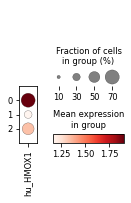

In [127]:
sc.pl.dotplot(human2,['hu_HMOX1'],groupby='leiden2')

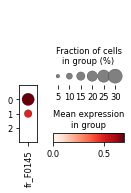

In [128]:
sc.pl.dotplot(frog2,['fr_F0145'],groupby='leiden2')

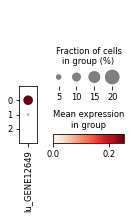

In [129]:
sc.pl.dotplot(lungfish2,['lu_GENE12649'],groupby='leiden2')

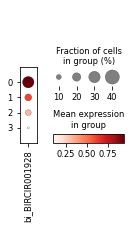

In [130]:
sc.pl.dotplot(bichir2,['bi_BIRCIR001928'],groupby='leiden2')

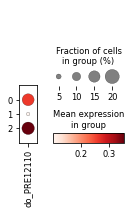

In [131]:
sc.pl.dotplot(dogshark2,['do_PRE12110'],groupby='leiden2')

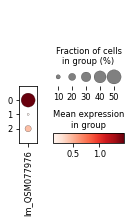

In [132]:
sc.pl.dotplot(lamprey2,['lm_QSM077976'],groupby='leiden2')

In [134]:
mac.write('H:/002.singcell/01.liver/10.mutileSpecies/05.SAMap/11.macrophage/macrophage.h5ad')

In [135]:
os.getcwd()

'H:\\002.singcell\\01.liver\\10.mutileSpecies\\05.SAMap'